In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

In [2]:
df = pd.read_csv('./preprocessed_2.csv')
df

,id,gender,age_group,race,body_shape
0,00001_00,woman,twenties,white,average
1,06679_00,woman,twenties,white,average
2,00006_00,woman,twenties,white,slim
3,06749_00,woman,twenties,white,slim
4,07212_00,woman,twenties,white,slim
...,...,...,...,...,...
13503,09866_00,woman,thirties,white,full-figured
13504,10118_00,woman,twenties,white,slim
13505,12690_00,woman,thirties,white,pregnant
13506,14152_00,woman,twenties,white,slim


In [3]:
df = df[df["age_group"] != "senior"]
df

,id,gender,age_group,race,body_shape
0,00001_00,woman,twenties,white,average
1,06679_00,woman,twenties,white,average
2,00006_00,woman,twenties,white,slim
3,06749_00,woman,twenties,white,slim
4,07212_00,woman,twenties,white,slim
...,...,...,...,...,...
13503,09866_00,woman,thirties,white,full-figured
13504,10118_00,woman,twenties,white,slim
13505,12690_00,woman,thirties,white,pregnant
13506,14152_00,woman,twenties,white,slim


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

def analyze_demographic_distribution(df):
    sns.set(style="whitegrid")
    columns = ['gender', 'age_group', 'race', 'body_shape']
    
    # 1. Distribution individuelle
    for col in columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # 2. Distribution croisée par paire
    combos = list(combinations(columns, 2))
    for col1, col2 in combos:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=col1, hue=col2)
        plt.title(f'Combinaison: {col1} vs {col2}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # 3. Distribution des combinaisons complètes
    df['combo'] = df['gender'] + ' | ' + df['age_group'] + ' | ' + df['race'] + ' | ' + df['body_shape']
    
    # Comptage des occurrences
    combo_counts = df['combo'].value_counts().sort_values(ascending=False)
    
    # Création du graphique
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x=combo_counts.values, y=combo_counts.index)
    
    # Ajout des annotations
    for i, value in enumerate(combo_counts.values):
        ax.text(value + 0.5, i, str(value), va='center')
    
    # Personnalisation
    plt.xlabel("Nombre d'occurrences")
    plt.ylabel("Combinaison (genre | âge | race | morphologie)")
    plt.title("Distribution des combinaisons des 4 attributs")
    plt.tight_layout()
    plt.show()

    # Optionnel : supprimer la colonne combo si tu ne veux pas la conserver
    df.drop(columns=['combo'], inplace=True, errors='ignore')


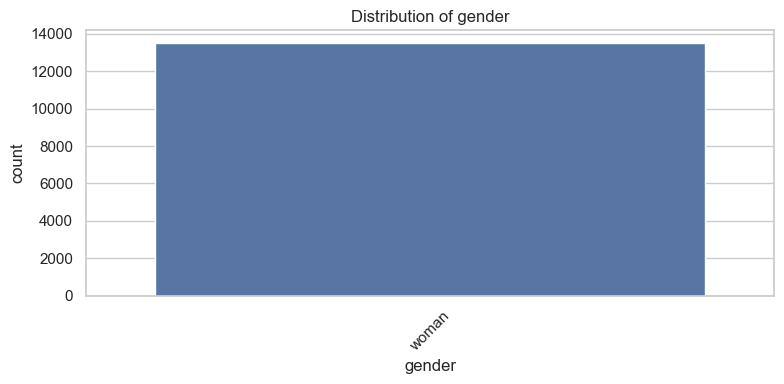

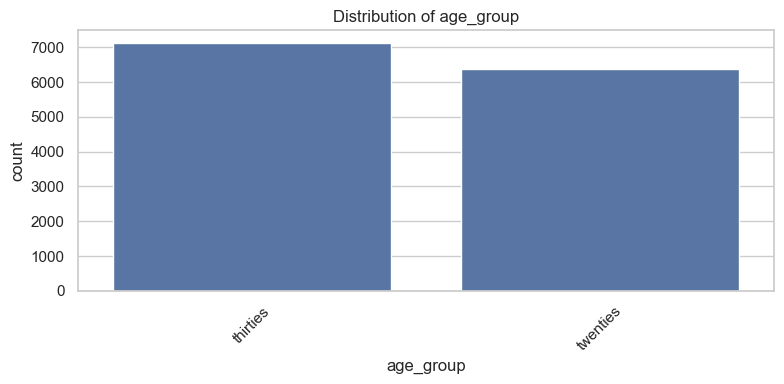

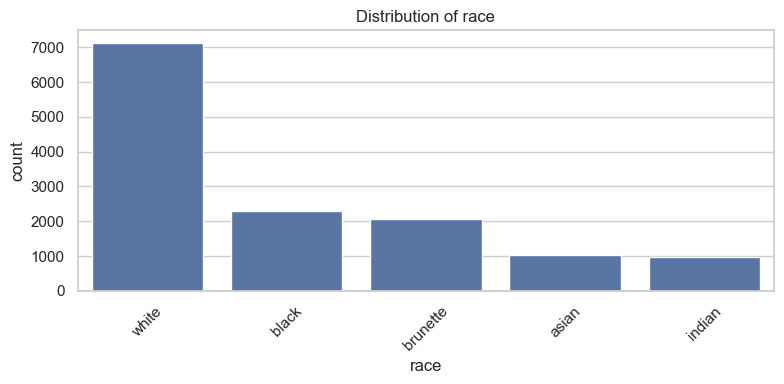

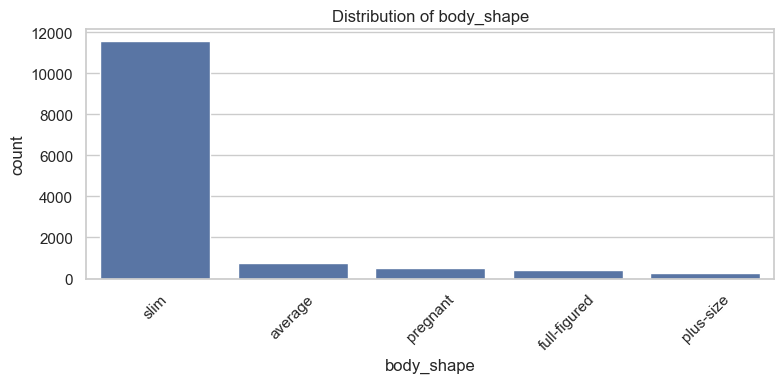

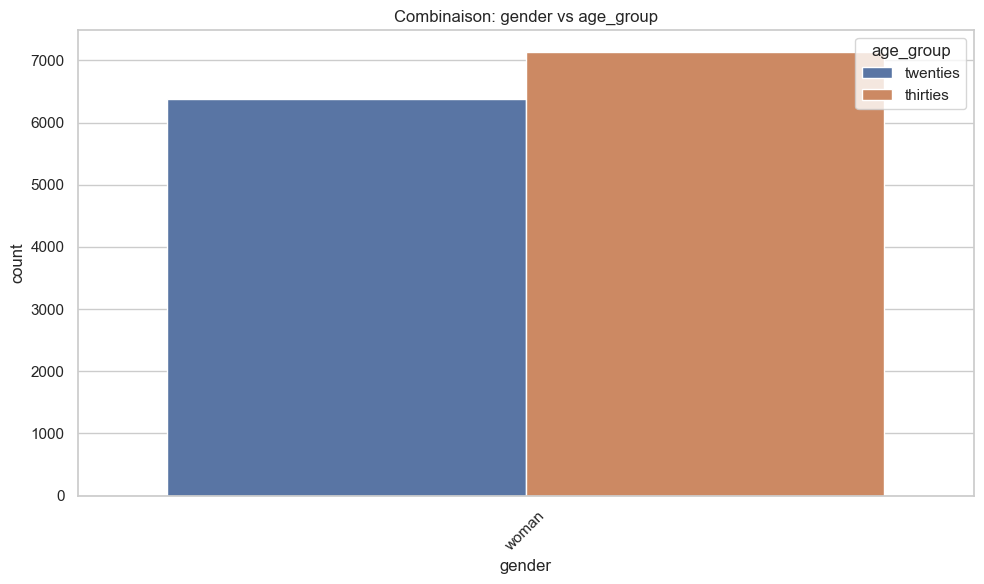

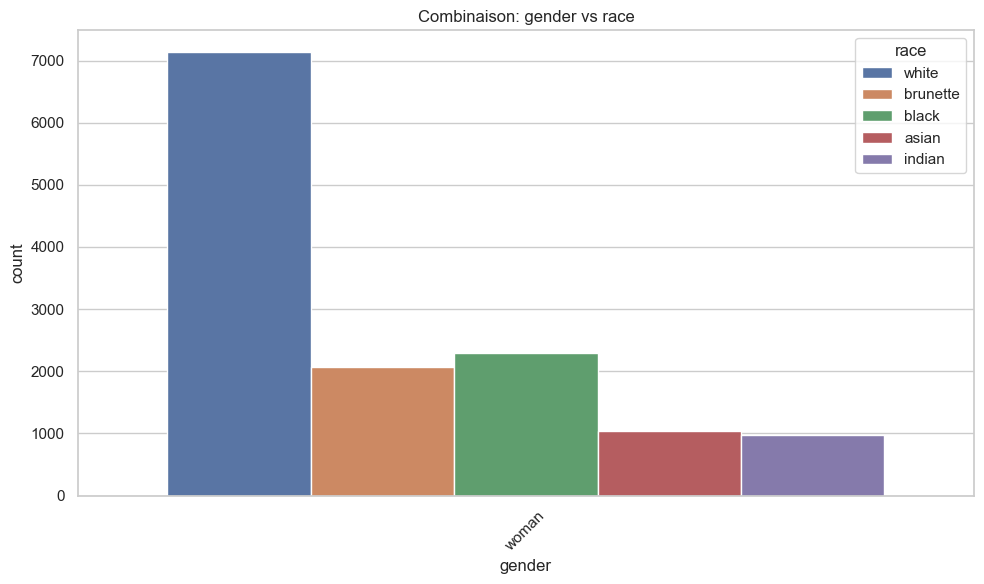

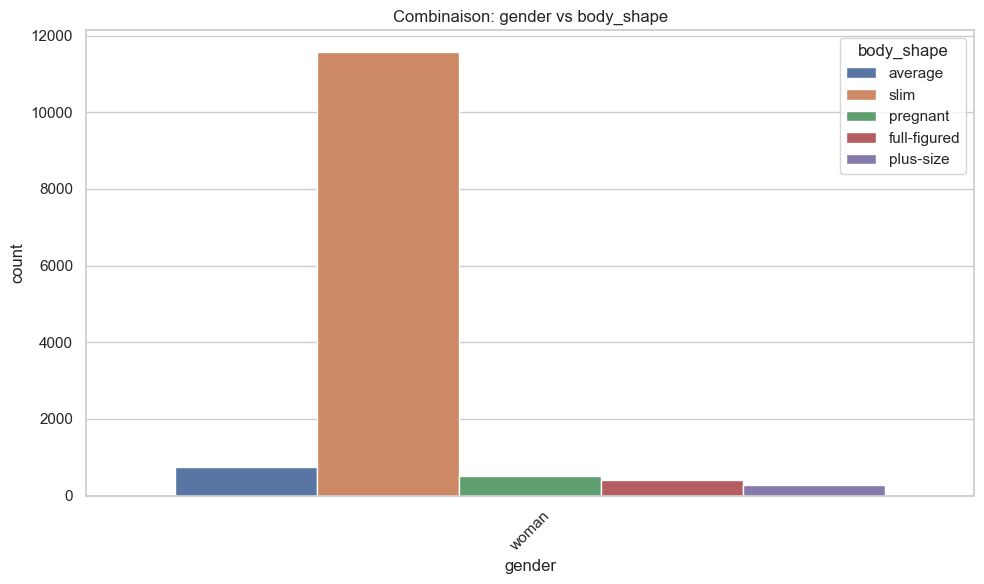

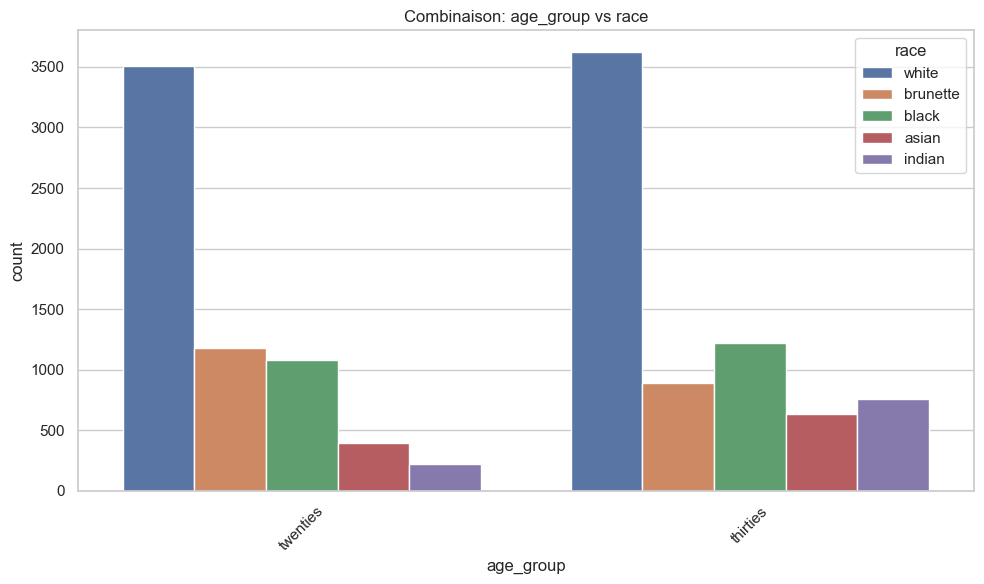

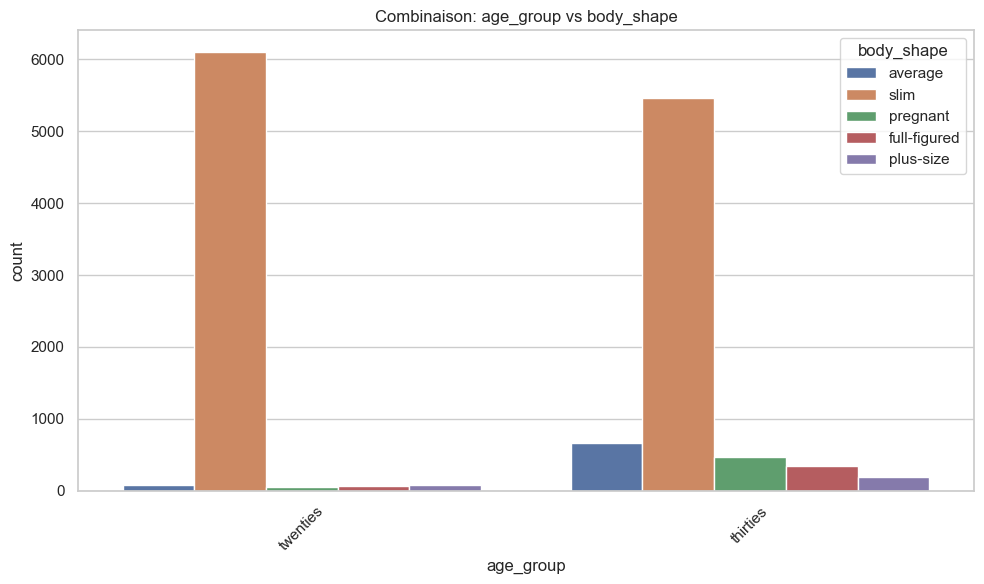

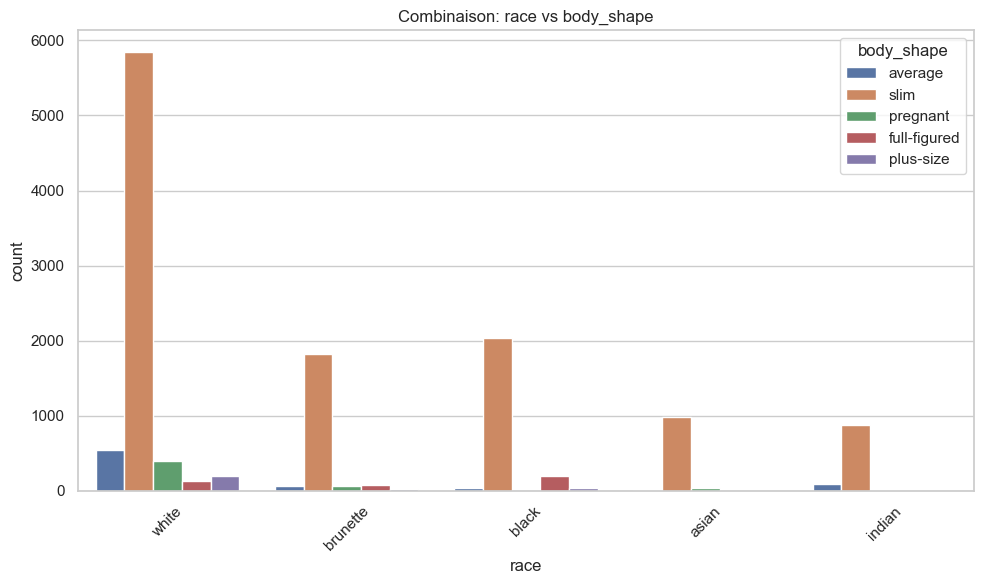

C:\Users\idirb\AppData\Local\Temp\ipykernel_19280\3055578073.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['combo'] = df['gender'] + ' | ' + df['age_group'] + ' | ' + df['race'] + ' | ' + df['body_shape']


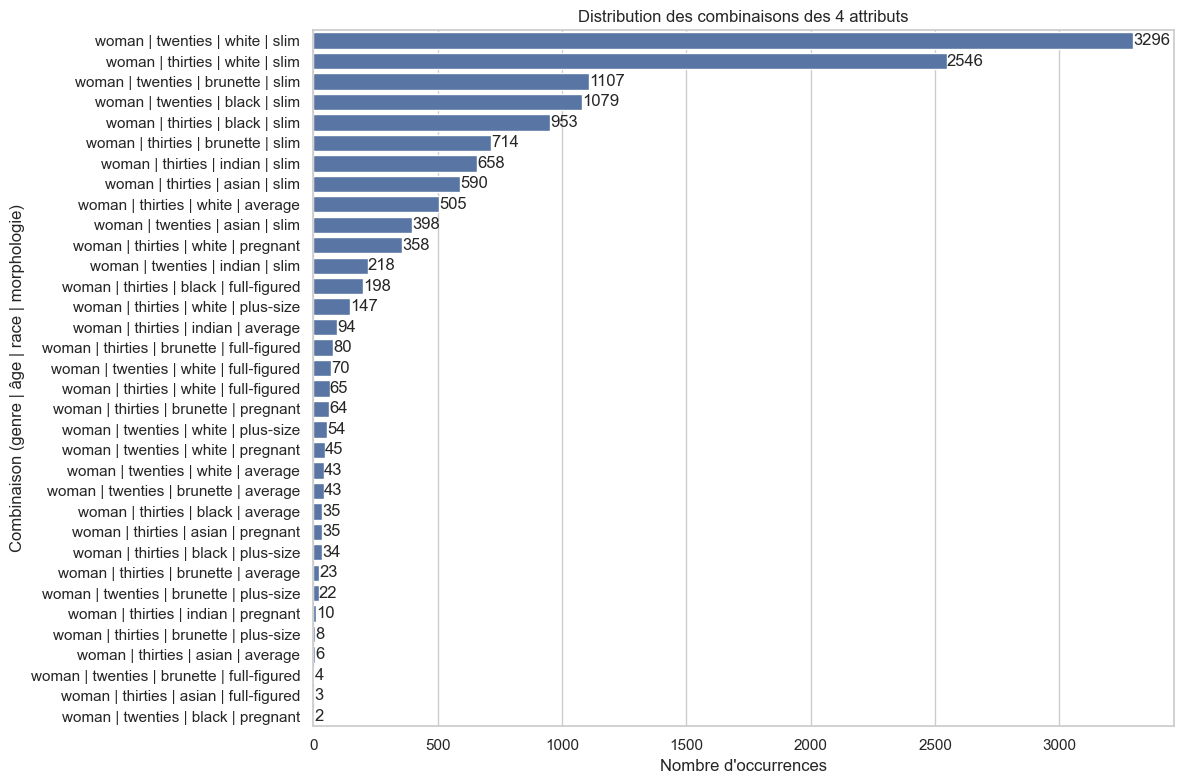

C:\Users\idirb\AppData\Local\Temp\ipykernel_19280\3055578073.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['combo'], inplace=True, errors='ignore')


In [5]:
analyze_demographic_distribution(df)

In [6]:
df_shuffled = df.sample(frac=1).reset_index(drop=True)
df_shuffled = df_shuffled

In [7]:
df_shuffled.to_csv('./preprocessed_final.csv', index=False)

In [8]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_shuffled, test_size=0.2, random_state=42)


In [9]:
train_df

,id,gender,age_group,race,body_shape
4315,03885_00,woman,thirties,brunette,slim
13030,03252_00,woman,twenties,white,slim
5589,08161_00,woman,thirties,indian,slim
4191,02583_00,woman,thirties,black,average
2450,12476_00,woman,thirties,black,slim
...,...,...,...,...,...
5191,07607_00,woman,thirties,brunette,slim
13418,08451_00,woman,thirties,white,average
5390,11959_00,woman,thirties,white,slim
860,08122_00,woman,twenties,white,slim


In [10]:
test_df

,id,gender,age_group,race,body_shape
4064,12916_00,woman,twenties,asian,slim
9280,07883_00,woman,thirties,white,slim
3477,03828_00,woman,thirties,white,slim
2227,04306_00,woman,twenties,asian,slim
6107,11706_00,woman,twenties,black,slim
...,...,...,...,...,...
6820,09317_00,woman,twenties,white,slim
8450,03061_00,woman,twenties,white,slim
4344,08390_00,woman,thirties,white,slim
7923,12874_00,woman,twenties,white,slim


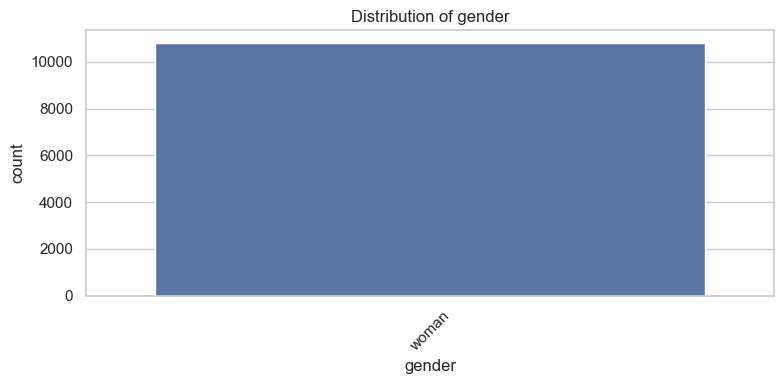

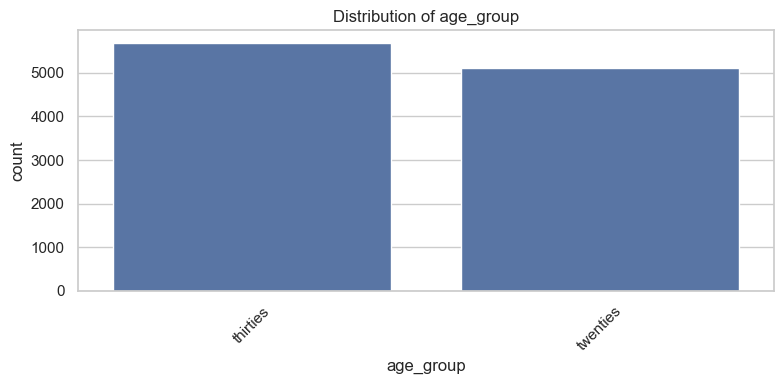

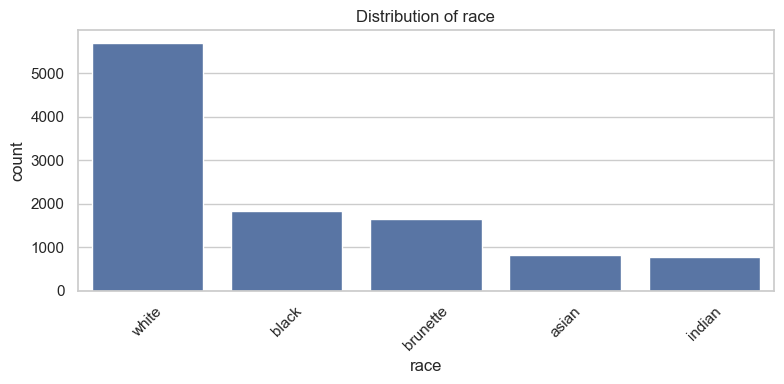

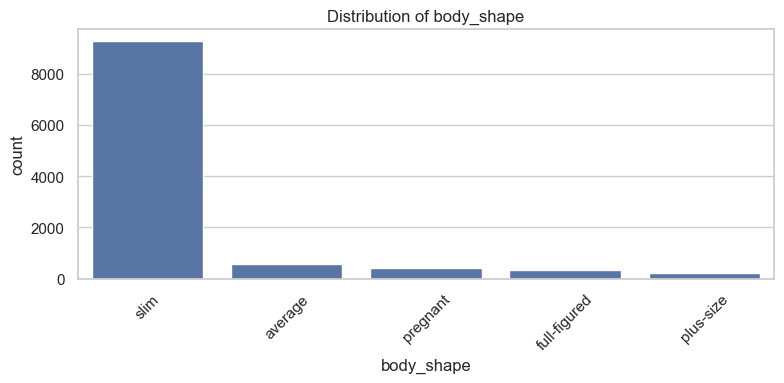

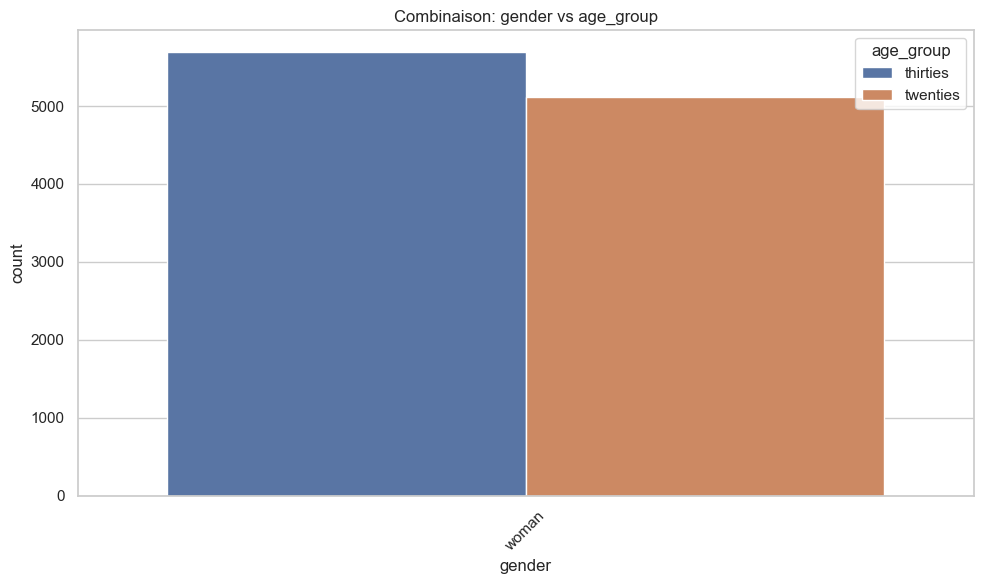

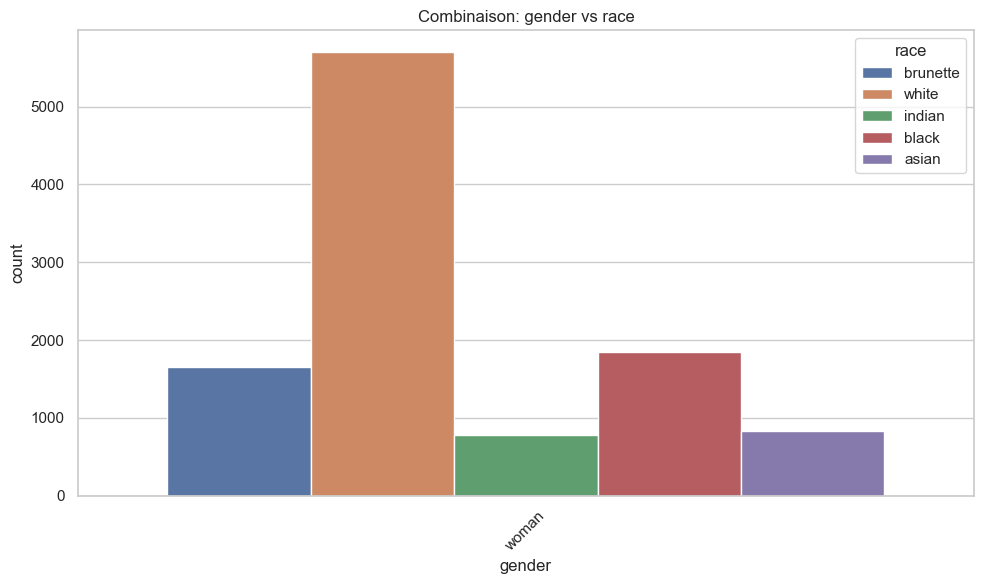

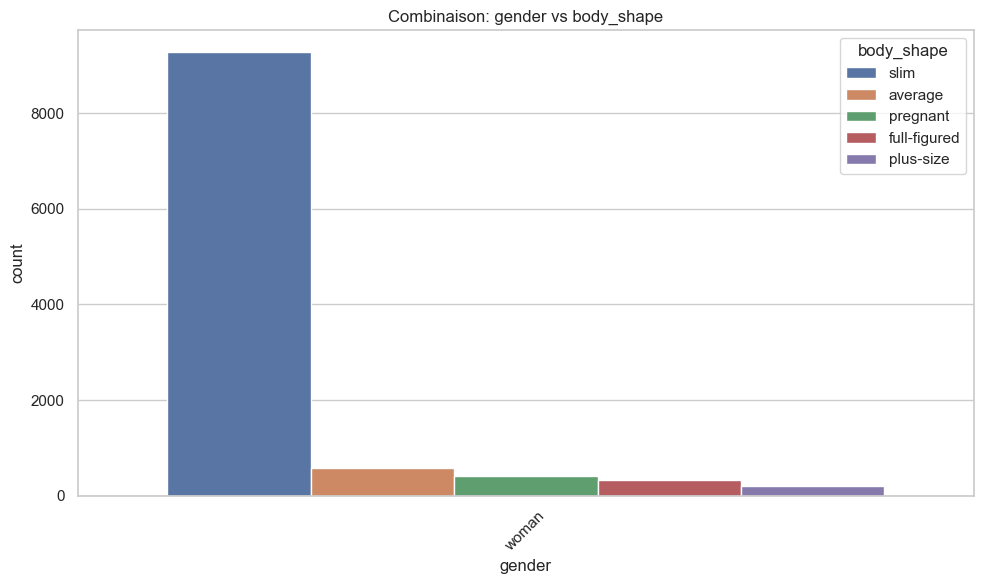

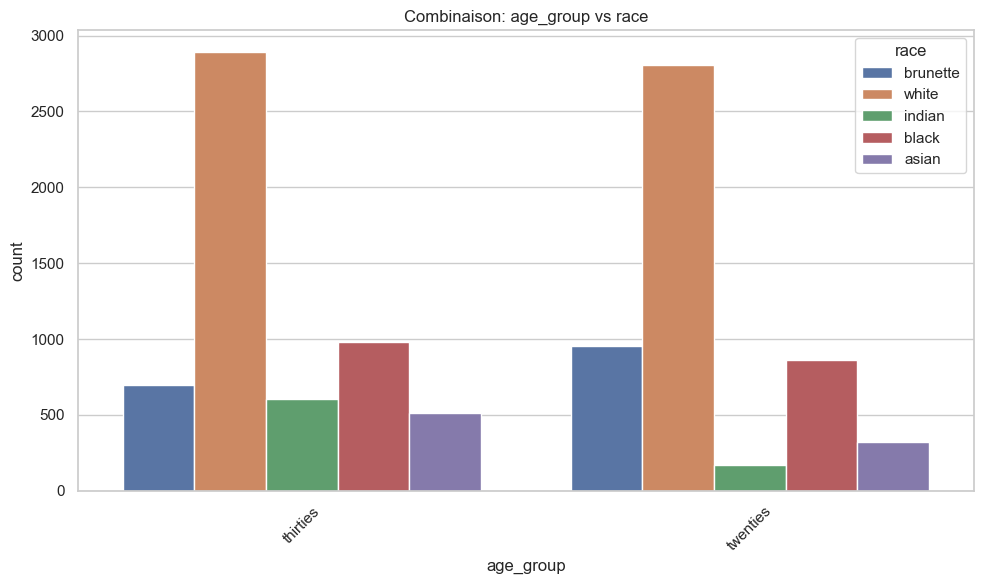

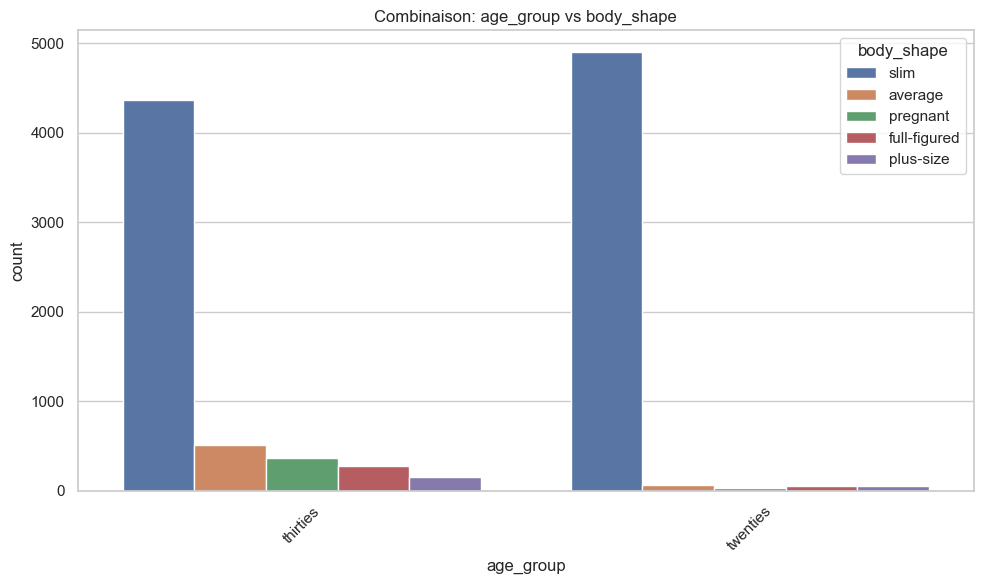

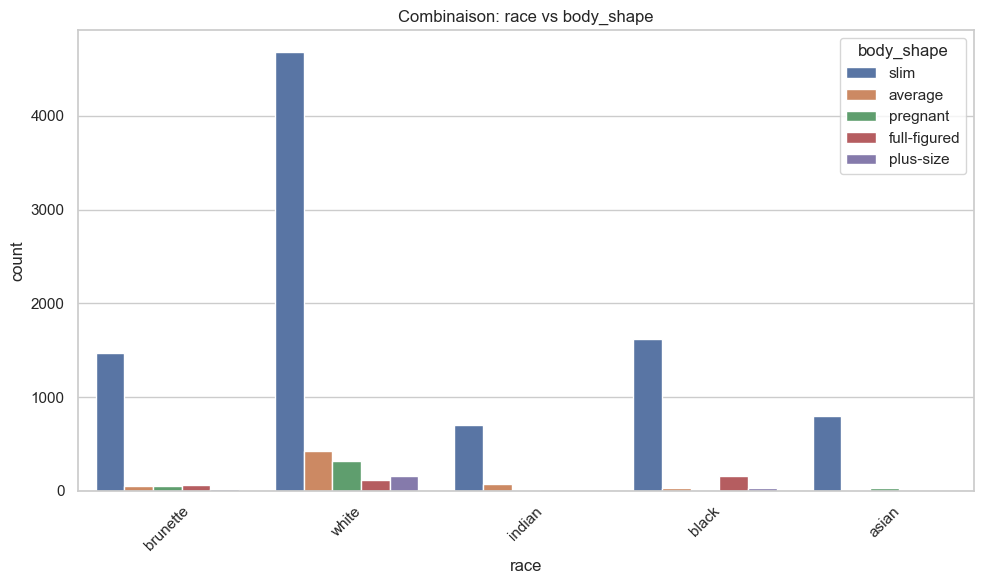

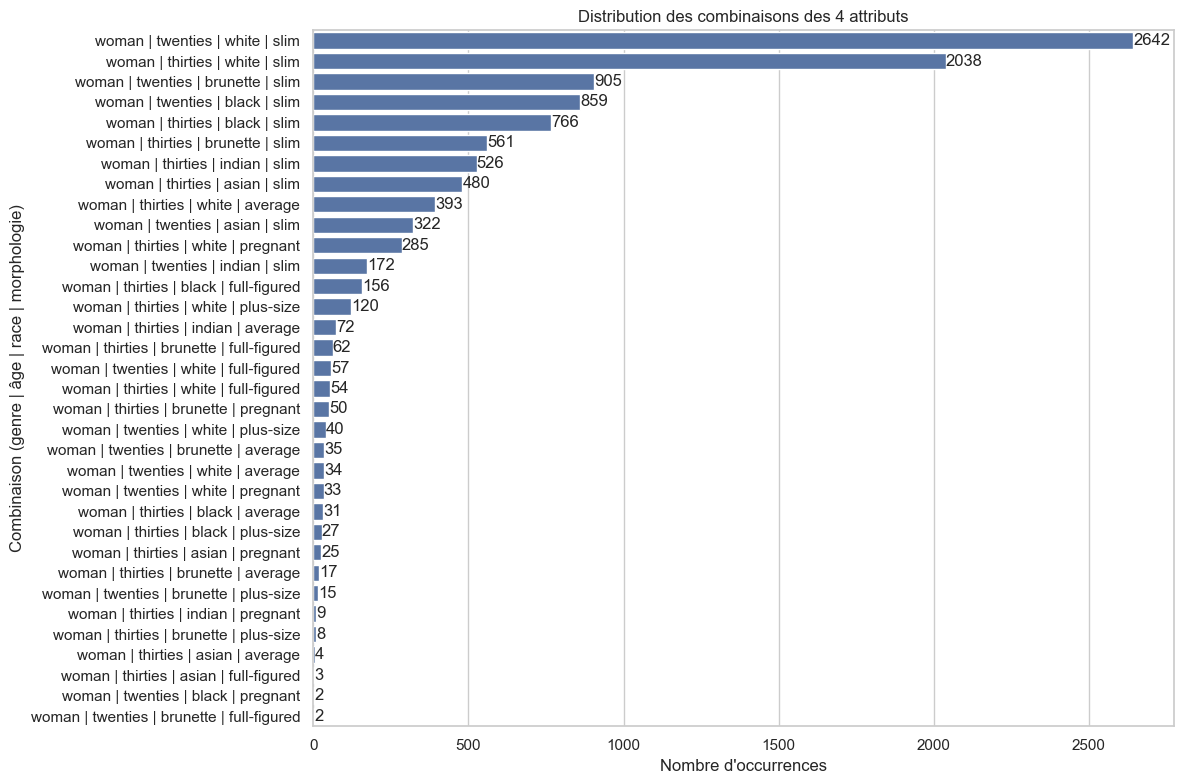

In [11]:
analyze_demographic_distribution(train_df)

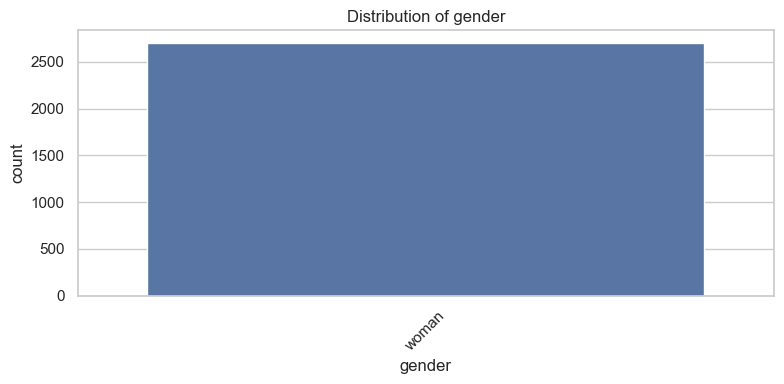

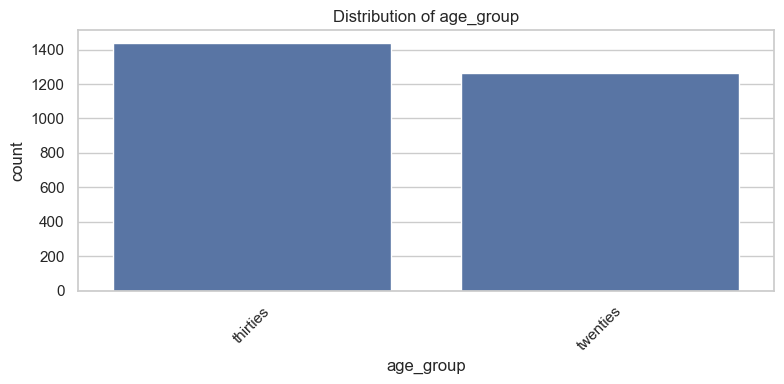

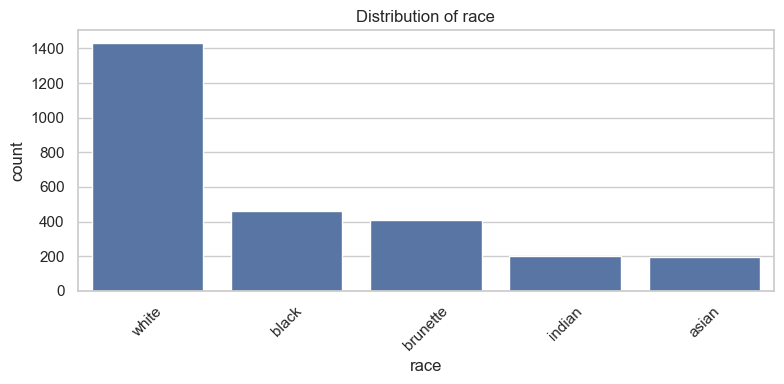

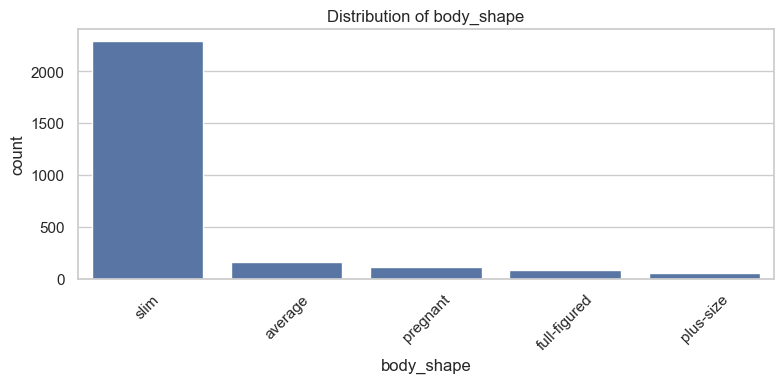

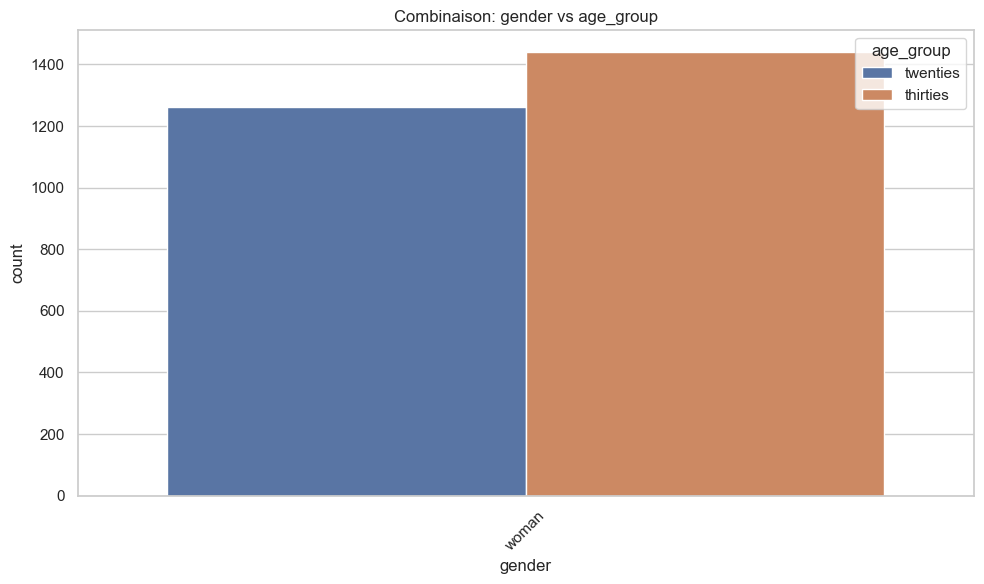

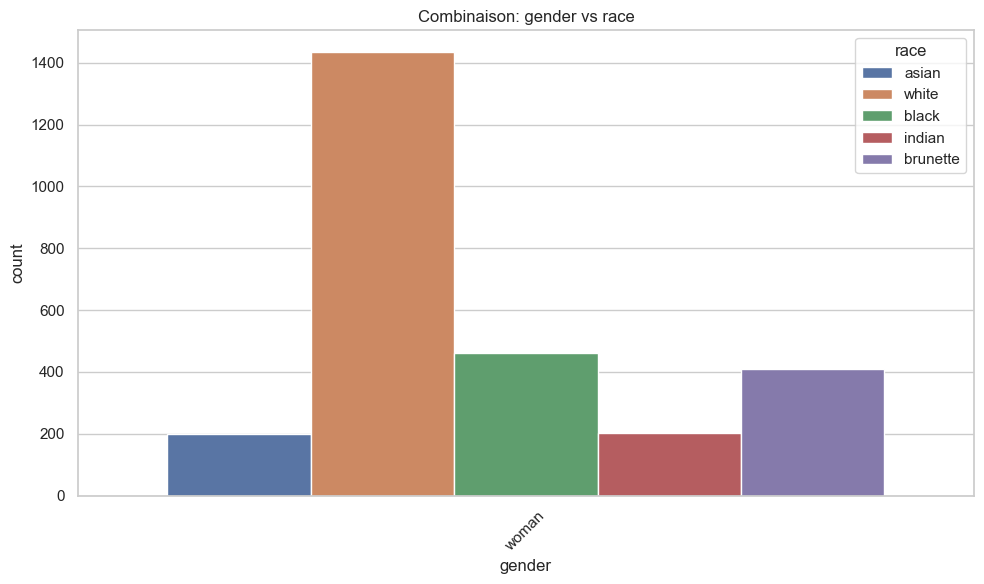

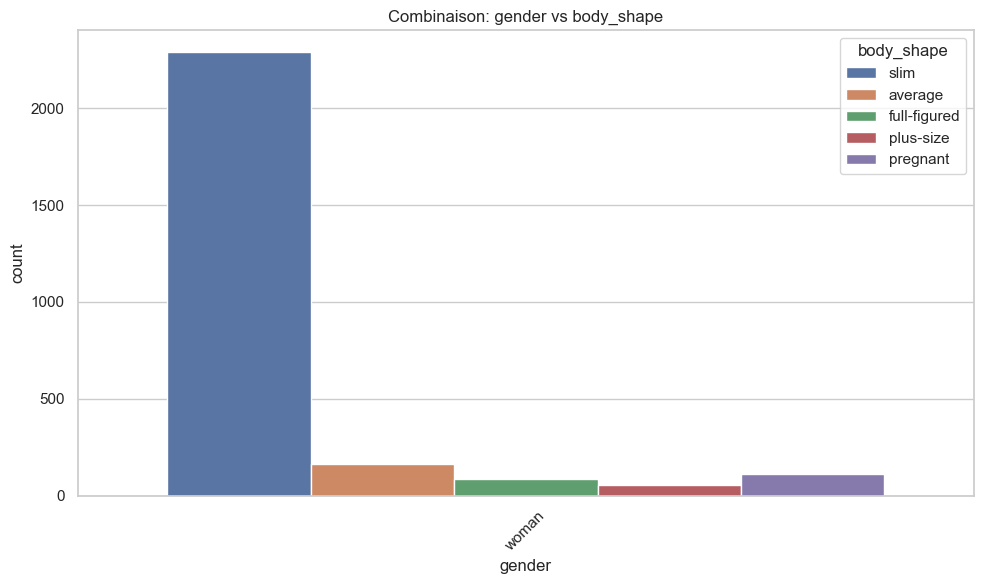

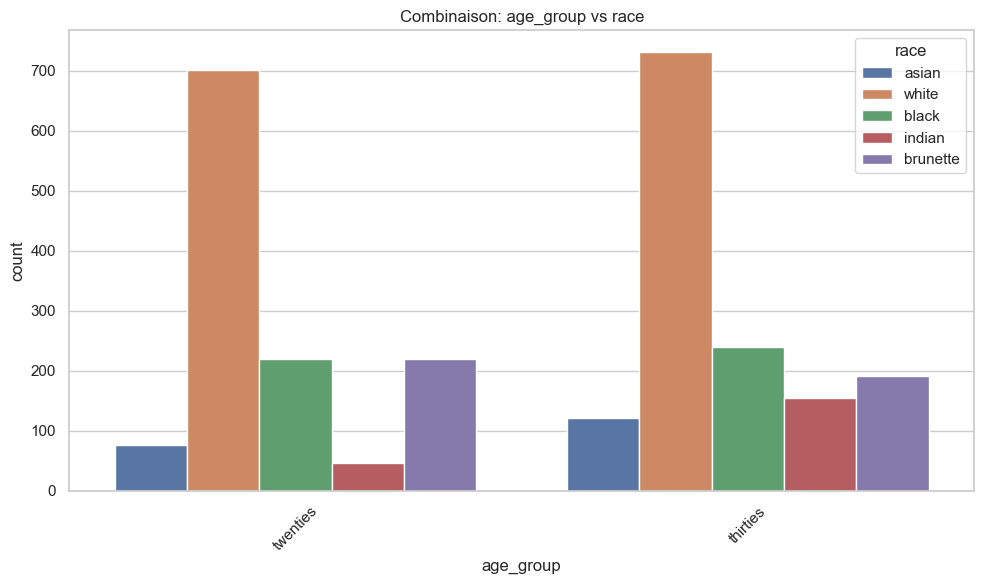

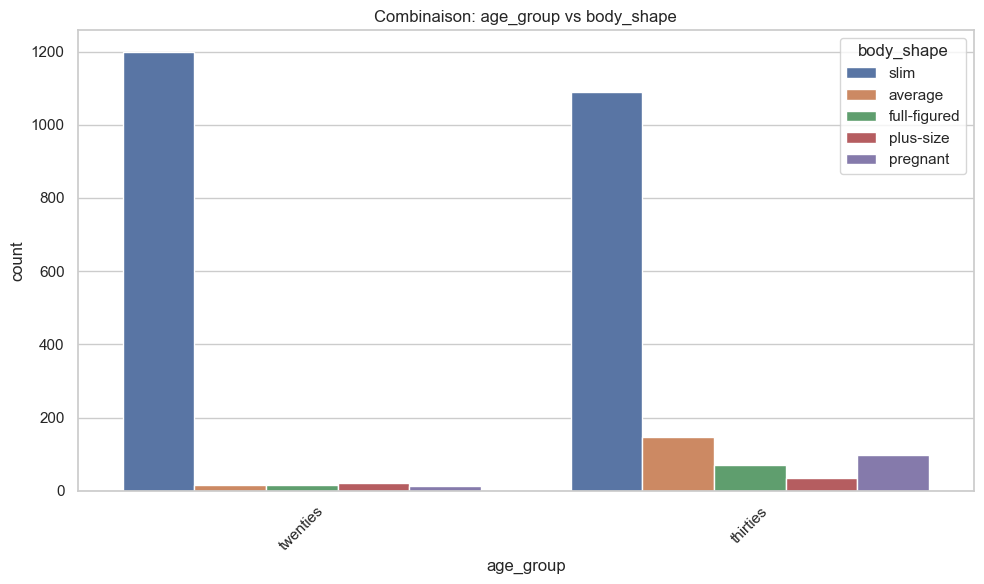

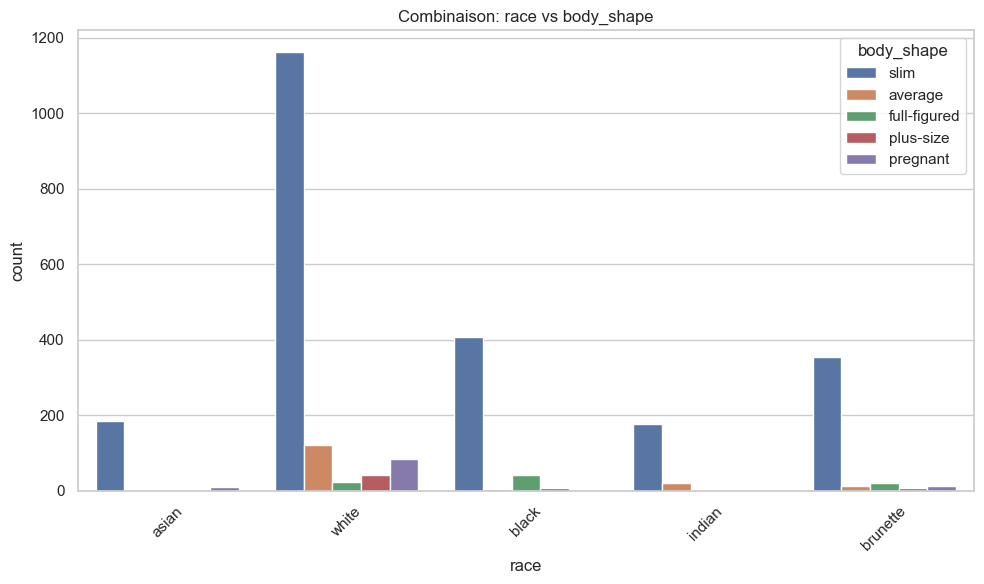

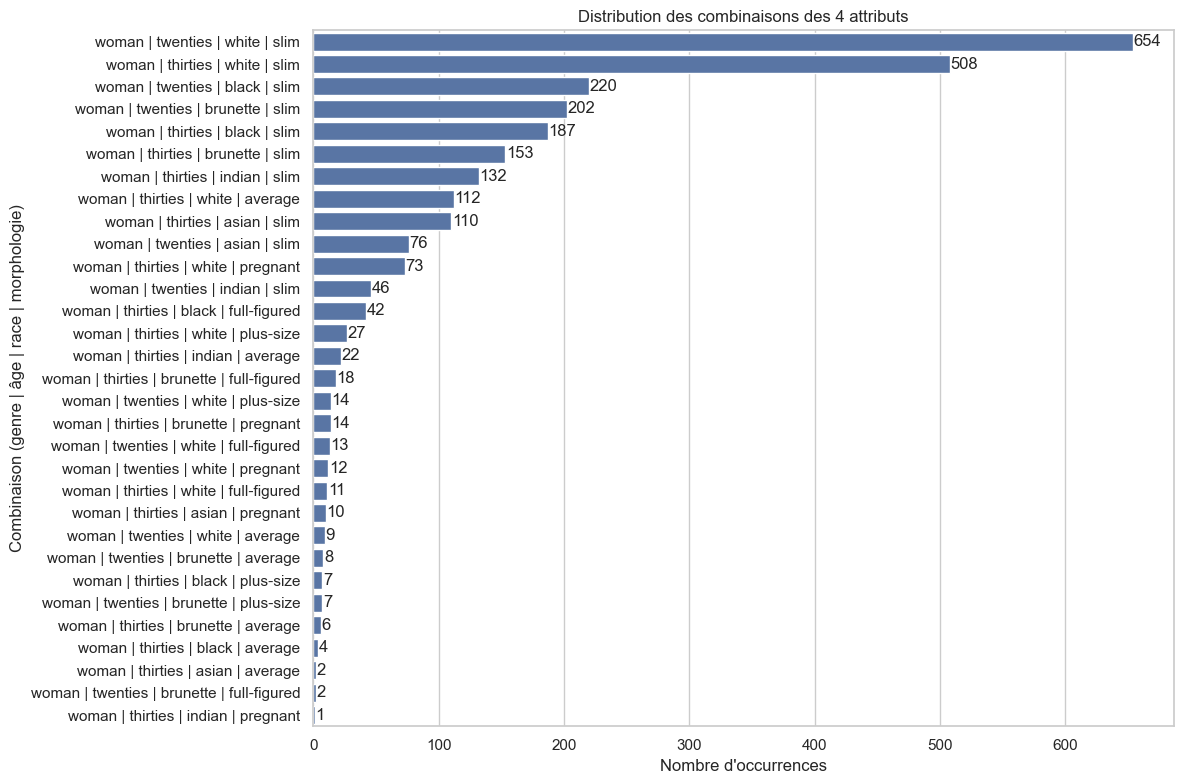

In [12]:
analyze_demographic_distribution(test_df)

In [13]:
train_df.to_csv('train.csv', index=False)
test_df.to_csv('test.csv', index=False)

In [14]:
import os
os.makedirs('../prompts', exist_ok=True)

In [18]:
def generate_prompt(row):
    a_an = 'an' if row['body_shape'] == 'average' else 'a'
    return f"A portrait of {a_an} {row['body_shape']} {row['race']} {row['gender']} in her {row['age_group']}, plain background."

def build_prompt_dataset(df):
    df['prompt'] = df.apply(generate_prompt, axis=1)
    return df[['id', 'prompt']]


In [19]:
train_prompt_df = build_prompt_dataset(train_df)
train_prompt_df.to_csv('../prompts/train.csv', index=False)

In [20]:
test_prompt_df = build_prompt_dataset(test_df)
test_prompt_df.to_csv('../prompts/test.csv', index=False)